#  Day2 

In [430]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.
highrad= pd.read_csv("H2HBABBA2016.csv")
highrad.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200915438,GROC corporation,NaN,2020.0,1.930592e+09,2020-03-05,20200303,20200305,20200320.0,USD,RV,1.0,NaN,11343.00,20200305.0,NAA8,1.930592e+09,1
1,U001,0200769623,WAL-MAR foundation,2019-10-29 00:00:00,2019.0,1.930007e+09,2019-10-12,20191011,20191012,20191027.0,USD,RV,1.0,NaN,50771.71,20191012.0,NAH4,1.930007e+09,0
2,U001,0200769623,WAL-MAR systems,2019-06-18 00:00:00,2019.0,1.929428e+09,2019-06-05,20190604,20190605,20190620.0,USD,RV,1.0,NaN,319.99,20190605.0,NAH4,1.929428e+09,0
3,U001,0200769623,WAL-MAR in,2019-02-06 00:00:00,2019.0,1.928677e+09,2019-01-25,20190124,20190125,20190209.0,USD,RV,1.0,NaN,63456.08,20190125.0,NAH4,1.928677e+09,0
4,U001,200353024,DECA corp,2019-07-24 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190723.0,USD,RV,1.0,NaN,11012.43,20190716.0,NAM1,1.929646e+09,0


# analysing the dataset

In [431]:
highrad.describe()
highrad.shape

(50000, 19)

In [432]:
highrad.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200915438,GROC corporation,NaN,2020.0,1.930592e+09,2020-03-05,20200303,20200305,20200320.0,USD,RV,1.0,NaN,11343.00,20200305.0,NAA8,1.930592e+09,1
1,U001,0200769623,WAL-MAR foundation,2019-10-29 00:00:00,2019.0,1.930007e+09,2019-10-12,20191011,20191012,20191027.0,USD,RV,1.0,NaN,50771.71,20191012.0,NAH4,1.930007e+09,0
2,U001,0200769623,WAL-MAR systems,2019-06-18 00:00:00,2019.0,1.929428e+09,2019-06-05,20190604,20190605,20190620.0,USD,RV,1.0,NaN,319.99,20190605.0,NAH4,1.929428e+09,0
3,U001,0200769623,WAL-MAR in,2019-02-06 00:00:00,2019.0,1.928677e+09,2019-01-25,20190124,20190125,20190209.0,USD,RV,1.0,NaN,63456.08,20190125.0,NAH4,1.928677e+09,0
4,U001,200353024,DECA corp,2019-07-24 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190723.0,USD,RV,1.0,NaN,11012.43,20190716.0,NAM1,1.929646e+09,0


In [433]:
#columns which contains no. of null values
highrad.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

#### how='any' will drop each and every single row contains null value

In [434]:
highrad.dropna(how='any').shape

(0, 19)

#### how='all' where all value in row is null

In [435]:
highrad.dropna(how='all').shape

(50000, 19)

In [436]:
highrad.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200915438,GROC corporation,NaN,2020.0,1.930592e+09,2020-03-05,20200303,20200305,20200320.0,USD,RV,1.0,NaN,11343.00,20200305.0,NAA8,1.930592e+09,1
1,U001,0200769623,WAL-MAR foundation,2019-10-29 00:00:00,2019.0,1.930007e+09,2019-10-12,20191011,20191012,20191027.0,USD,RV,1.0,NaN,50771.71,20191012.0,NAH4,1.930007e+09,0
2,U001,0200769623,WAL-MAR systems,2019-06-18 00:00:00,2019.0,1.929428e+09,2019-06-05,20190604,20190605,20190620.0,USD,RV,1.0,NaN,319.99,20190605.0,NAH4,1.929428e+09,0
3,U001,0200769623,WAL-MAR in,2019-02-06 00:00:00,2019.0,1.928677e+09,2019-01-25,20190124,20190125,20190209.0,USD,RV,1.0,NaN,63456.08,20190125.0,NAH4,1.928677e+09,0
4,U001,200353024,DECA corp,2019-07-24 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190723.0,USD,RV,1.0,NaN,11012.43,20190716.0,NAM1,1.929646e+09,0


In [437]:
highrad[10:25]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200769623,WAL-MAR us,2019-04-23 00:00:00,2019.0,1.929129e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,33310.89,20190412.0,NAH4,1.929129e+09,0
11,CA02,0140104409,LOB,2019-05-10 00:00:00,2019.0,2.960543e+09,2019-04-26,20190426,20190426,20190510.0,CAD,RV,1.0,NaN,73422.35,20190430.0,CA10,2.960543e+09,0
12,U001,0100031704,DELHAIZE us,2019-09-06 00:00:00,2019.0,1.929774e+09,2019-08-23,20190822,20190823,20191027.0,USD,RV,1.0,NaN,2709.61,20190823.0,NAGD,1.929774e+09,0
13,U001,0200704858,WAKE,2019-09-12 00:00:00,2019.0,1.929797e+09,2019-08-27,20190827,20190827,20190911.0,USD,RV,1.0,NaN,28498.01,20190827.0,NAA8,1.929797e+09,0
14,U001,0200759878,SA foundation,2019-12-30 00:00:00,2019.0,1.930264e+09,2019-12-13,20191211,20191213,20191228.0,USD,RV,1.0,NaN,28143.94,20191213.0,NAH4,1.930264e+09,0
15,U001,0200772670,ASSOCIAT,NaN,2020.0,1.930731e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,1276.23,20200401.0,NAU5,1.930731e+09,1
16,U001,0200759878,SA us,2019-04-24 00:00:00,2019.0,1.929094e+09,2019-04-07,20190405,20190407,20190422.0,USD,RV,1.0,NaN,19108.18,20190407.0,NAH4,1.929094e+09,0
17,U001,200555117,BURR co,NaN,2020.0,1.930749e+09,2020-04-05,20200404,20200405,20200420.0,USD,RV,1.0,NaN,118391.34,20200405.0,NAA8,1.930749e+09,1
18,U001,0200759878,SA trust,2020-03-05 00:00:00,2020.0,1.930538e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,98930.88,20200219.0,NAH4,1.930538e+09,0
19,U001,0200592182,DECA co,2019-01-28 00:00:00,2019.0,1.928697e+09,2019-01-28,20190128,20190128,20190123.0,USD,RV,1.0,NaN,5933.23,20190116.0,NAM1,1.928697e+09,0


In [438]:
highrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

removing the null values and columns which are not helpful

In [439]:
highrad.drop('area_business' ,axis=1,inplace=True)


In [440]:
highrad

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200915438,GROC corporation,NaN,2020.0,1.930592e+09,2020-03-05,20200303,20200305,20200320.0,USD,RV,1.0,11343.00,20200305.0,NAA8,1.930592e+09,1
1,U001,0200769623,WAL-MAR foundation,2019-10-29 00:00:00,2019.0,1.930007e+09,2019-10-12,20191011,20191012,20191027.0,USD,RV,1.0,50771.71,20191012.0,NAH4,1.930007e+09,0
2,U001,0200769623,WAL-MAR systems,2019-06-18 00:00:00,2019.0,1.929428e+09,2019-06-05,20190604,20190605,20190620.0,USD,RV,1.0,319.99,20190605.0,NAH4,1.929428e+09,0
3,U001,0200769623,WAL-MAR in,2019-02-06 00:00:00,2019.0,1.928677e+09,2019-01-25,20190124,20190125,20190209.0,USD,RV,1.0,63456.08,20190125.0,NAH4,1.928677e+09,0
4,U001,200353024,DECA corp,2019-07-24 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190723.0,USD,RV,1.0,11012.43,20190716.0,NAM1,1.929646e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR associates,2019-03-06 00:00:00,2019.0,1.928846e+09,2019-02-24,20190222,20190224,20190311.0,USD,RV,1.0,14722.89,20190224.0,NAH4,1.928846e+09,0
49996,U001,200020431,DEC llc,2019-07-16 00:00:00,2019.0,1.929576e+09,2019-07-04,20190704,20190704,20190724.0,USD,RV,1.0,1077.12,20190701.0,NAM4,1.929576e+09,0
49997,U001,0200769623,WAL-MAR,NaN,2020.0,1.930704e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,24123.89,20200325.0,NAH4,1.930704e+09,1
49998,U001,0200759878,SA llc,NaN,2020.0,1.930574e+09,2020-02-27,20200226,20200227,20200313.0,USD,RV,1.0,8614.36,20200227.0,NAH4,1.930574e+09,1


removing the constant column 

In [441]:
highrad.drop('posting_id',axis=1,inplace=True)

In [442]:
highrad.drop('document_create_date.1',axis=1,inplace=True)

In [443]:
highrad.drop('invoice_id',axis=1,inplace=True)

In [444]:
highrad.shape

(50000, 15)

# CONSTANT/DUPLICATE REMOVE 

droping the duplicate data

In [445]:
highrad.duplicated().sum()

1160

In [446]:
highrad[highrad.duplicated()].shape

(1160, 15)

In [447]:
highrad=highrad.drop_duplicates(keep="first")
highrad.shape

(48840, 15)

In [448]:
highrad.dtypes


business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
document type            object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
isOpen                    int64
dtype: object

# converting datetime conversion

In [449]:
# converting the colomn into  format date 
highrad['document_create_date'] = pd.to_datetime(highrad['document_create_date'].astype(str))


In [450]:
# converting due in date to datetime format
highrad['due_in_date'] = pd.to_datetime(highrad['due_in_date'].astype(int).astype(str))


In [451]:
highrad['clear_date']=pd.to_datetime(highrad['clear_date'].astype(str))


In [452]:
highrad['baseline_create_date']=pd.to_datetime(highrad['baseline_create_date'].astype(int).astype(str))


In [453]:
highrad.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200915438,GROC corporation,NaT,2020.0,1.930592e+09,2020-03-05,2020-03-03,2020-03-20,USD,RV,11343.00,2020-03-05,NAA8,1
1,U001,0200769623,WAL-MAR foundation,2019-10-29,2019.0,1.930007e+09,2019-10-12,2019-10-11,2019-10-27,USD,RV,50771.71,2019-10-12,NAH4,0
2,U001,0200769623,WAL-MAR systems,2019-06-18,2019.0,1.929428e+09,2019-06-05,2019-06-04,2019-06-20,USD,RV,319.99,2019-06-05,NAH4,0
3,U001,0200769623,WAL-MAR in,2019-02-06,2019.0,1.928677e+09,2019-01-25,2019-01-24,2019-02-09,USD,RV,63456.08,2019-01-25,NAH4,0
4,U001,200353024,DECA corp,2019-07-24,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-23,USD,RV,11012.43,2019-07-16,NAM1,0


In [454]:
highrad.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date                    object
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
dtype: object

# spliting the data  into test data and train data

In [455]:

test=highrad[highrad.clear_date.isnull()]
test


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200915438,GROC corporation,NaT,2020.0,1.930592e+09,2020-03-05,2020-03-03,2020-03-20,USD,RV,11343.00,2020-03-05,NAA8,1
6,U001,0200705742,DOT foundation,NaT,2020.0,1.930653e+09,2020-03-16,2020-03-16,2020-04-17,USD,RV,20683.23,2020-03-16,NA32,1
9,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930808e+09,2020-04-21,2020-04-21,2020-05-06,USD,RV,1898.90,2020-04-21,NAH4,1
15,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930731e+09,2020-04-01,2020-04-01,2020-04-16,USD,RV,1276.23,2020-04-01,NAU5,1
17,U001,200555117,BURR co,NaT,2020.0,1.930749e+09,2020-04-05,2020-04-04,2020-04-20,USD,RV,118391.34,2020-04-05,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,CA02,0140105508,DOLLARA systems,NaT,2020.0,2.960618e+09,2020-03-02,2020-03-02,2020-03-15,CAD,RV,41133.74,2020-03-05,CA10,1
49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930711e+09,2020-03-28,2020-03-27,2020-04-12,USD,RV,33635.14,2020-03-28,NAH4,1
49994,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930829e+09,2020-04-26,2020-04-27,2020-05-11,USD,RV,9484.93,2020-04-26,NAH4,1
49997,U001,0200769623,WAL-MAR,NaT,2020.0,1.930704e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,24123.89,2020-03-25,NAH4,1


### Null Imputation

In [456]:
train= highrad[highrad.clear_date.isnull()==False]

In [457]:
train.shape,test.shape

((39128, 15), (9712, 15))

In [458]:
train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date                    object
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
dtype: object

other way to check the variance is nunique

In [459]:
train.nunique()

business_code               6
cust_number              1289
name_customer            3875
clear_date                392
buisness_year               2
doc_id                  39128
posting_date              422
document_create_date      428
due_in_date               493
invoice_currency            2
document type               2
total_open_amount       35493
baseline_create_date      431
cust_payment_terms         71
isOpen                      1
dtype: int64

value_counts for object returning the unique values in descending orders

In [460]:
train.name_customer.value_counts()

WAL-MAR in             883
WAL-MAR corporation    875
WAL-MAR trust          875
WAL-MAR corp           870
WAL-MAR co             859
                      ... 
LAND systems             1
JOSE trust               1
SOUTH  foundation        1
MARCOS  corporation      1
AN corporation           1
Name: name_customer, Length: 3875, dtype: int64

we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the train set

In [461]:
train.sort_values(by=['document_create_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
5908,U013,0100024077,GLOBAL us,2019-02-14,2019.0,1.991819e+09,2018-12-30,2018-12-26,2019-02-13,USD,RV,11734.73,2018-12-30,NAVF,0
3739,U013,0140103423,COS corporation,2019-01-17,2019.0,1.991820e+09,2019-01-01,2018-12-28,2019-01-31,USD,RV,3533.53,2019-01-01,NAVE,0
34790,U001,0200794332,COST trust,2019-01-17,2019.0,1.928532e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,2052.53,2018-12-30,NAAX,0
18945,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928541e+09,2018-12-31,2018-12-29,2019-01-15,USD,RV,31.56,2018-12-31,NAA8,0
34226,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,3748.84,2018-12-30,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30036,U001,0200769623,WAL-MAR trust,2020-03-10,2020.0,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,RV,5126.33,2020-02-26,NAH4,0
20838,U001,0200707741,SMART & associates,2020-03-12,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,19447.11,2020-02-27,NAA8,0
2740,U001,0200974851,RESTA,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,RV,4235.83,2020-02-26,NAA8,0
6279,U001,0200895843,US associates,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-13,USD,RV,35655.90,2020-02-27,NAA8,0


In [462]:
# to see the value count of business code category
train['business_code'].value_counts()

U001    35438
CA02     3060
U013      496
U002      120
U005       11
U007        3
Name: business_code, dtype: int64

In [463]:
train['name_customer'].value_counts()

WAL-MAR in             883
WAL-MAR corporation    875
WAL-MAR trust          875
WAL-MAR corp           870
WAL-MAR co             859
                      ... 
LAND systems             1
JOSE trust               1
SOUTH  foundation        1
MARCOS  corporation      1
AN corporation           1
Name: name_customer, Length: 3875, dtype: int64

In [464]:
train['buisness_year'].value_counts()
# here we can see the business happened in 2019 is more than in 2020

2019.0    33952
2020.0     5176
Name: buisness_year, dtype: int64

In [465]:
train['invoice_currency'].value_counts()

USD    36068
CAD     3060
Name: invoice_currency, dtype: int64

In [466]:
# adding a new column delay which clear - due in date
train['delay']=train['clear_date'].subtract(train['due_in_date']).dt.days

In [467]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
1,U001,0200769623,WAL-MAR foundation,2019-10-29,2019.0,1.930007e+09,2019-10-12,2019-10-11,2019-10-27,USD,RV,50771.71,2019-10-12,NAH4,0,2
2,U001,0200769623,WAL-MAR systems,2019-06-18,2019.0,1.929428e+09,2019-06-05,2019-06-04,2019-06-20,USD,RV,319.99,2019-06-05,NAH4,0,-2
3,U001,0200769623,WAL-MAR in,2019-02-06,2019.0,1.928677e+09,2019-01-25,2019-01-24,2019-02-09,USD,RV,63456.08,2019-01-25,NAH4,0,-3
4,U001,200353024,DECA corp,2019-07-24,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-23,USD,RV,11012.43,2019-07-16,NAM1,0,1
5,U001,0200769623,WAL-MAR associates,2019-05-24,2019.0,1.929303e+09,2019-05-14,2019-05-12,2019-05-29,USD,RV,29360.41,2019-05-14,NAH4,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,U001,0200732755,KROGER llc,2019-11-18,2019.0,1.930093e+09,2019-11-02,2019-11-02,2019-11-17,USD,RV,157445.73,2019-11-02,NAA8,0,1
49991,U001,0200769623,WAL-MAR co,2019-02-19,2019.0,1.928710e+09,2019-01-31,2019-01-30,2019-02-15,USD,RV,186.40,2019-01-31,NAH4,0,4
49995,U001,0200769623,WAL-MAR associates,2019-03-06,2019.0,1.928846e+09,2019-02-24,2019-02-22,2019-03-11,USD,RV,14722.89,2019-02-24,NAH4,0,-5
49996,U001,200020431,DEC llc,2019-07-16,2019.0,1.929576e+09,2019-07-04,2019-07-04,2019-07-24,USD,RV,1077.12,2019-07-01,NAM4,0,-8


In [468]:
train=train.sort_values(by="document_create_date")


In [469]:
train.shape

(39128, 16)

# split train data into train and validation according to date

In [470]:
validation=train.loc[train['document_create_date']>'2019-10-01',:]
validation.shape

(12307, 16)

In [471]:
train=train.loc[train['document_create_date']<'2019-10-01',:]
train.shape

(26698, 16)

In [472]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
5908,U013,0100024077,GLOBAL us,2019-02-14,2019.0,1.991819e+09,2018-12-30,2018-12-26,2019-02-13,USD,RV,11734.73,2018-12-30,NAVF,0,1
3739,U013,0140103423,COS corporation,2019-01-17,2019.0,1.991820e+09,2019-01-01,2018-12-28,2019-01-31,USD,RV,3533.53,2019-01-01,NAVE,0,-14
34790,U001,0200794332,COST trust,2019-01-17,2019.0,1.928532e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,2052.53,2018-12-30,NAAX,0,3
18945,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928541e+09,2018-12-31,2018-12-29,2019-01-15,USD,RV,31.56,2018-12-31,NAA8,0,0
34226,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,3748.84,2018-12-30,NAH4,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37876,U001,0200759878,SA associates,2019-10-16,2019.0,1.929929e+09,2019-09-29,2019-09-30,2019-10-14,USD,RV,29804.34,2019-09-29,NAH4,0,2
22517,U001,0200806580,BE associates,2019-10-11,2019.0,1.929922e+09,2019-09-30,2019-09-30,2019-10-15,USD,RV,1626.50,2019-09-30,NAA8,0,-4
40354,CA02,0140118168,RONALD co,2019-10-29,2019.0,2.960582e+09,2019-09-30,2019-09-30,2019-10-31,CAD,RV,22560.00,2019-10-01,CA30,0,-2
40479,U001,0200397082,GENE in,2019-12-31,2019.0,1.929942e+09,2019-09-30,2019-09-30,2019-12-29,USD,RV,6271.00,2019-09-30,NAVM,0,2


In [473]:
validation

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
12233,CA02,0140104423,METRO,2019-10-11,2019.0,2.960583e+09,2019-10-02,2019-10-02,2019-10-13,CAD,RV,48544.63,2019-10-03,CA10,0,-2
38563,U001,0200741831,SUPE corp,2019-10-21,2019.0,1.929954e+09,2019-10-02,2019-10-02,2019-10-17,USD,RV,20910.40,2019-10-02,NAA8,0,4
38552,U001,0200704858,WAKE corp,2019-10-15,2019.0,1.929953e+09,2019-10-03,2019-10-02,2019-10-18,USD,RV,156626.62,2019-10-03,NAA8,0,-3
33459,U001,0200744019,TARG us,2019-10-22,2019.0,1.929957e+09,2019-10-04,2019-10-02,2019-10-19,USD,RV,4614.62,2019-10-04,NAA8,0,3
11976,U001,CCU013,KRAFT F foundation,2019-11-27,2019.0,1.929951e+09,2019-10-02,2019-10-02,2019-10-02,USD,RV,10204.80,2019-10-02,NAX2,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30036,U001,0200769623,WAL-MAR trust,2020-03-10,2020.0,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,RV,5126.33,2020-02-26,NAH4,0,-2
20838,U001,0200707741,SMART & associates,2020-03-12,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,19447.11,2020-02-27,NAA8,0,-1
2740,U001,0200974851,RESTA,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,RV,4235.83,2020-02-26,NAA8,0,0
6279,U001,0200895843,US associates,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-13,USD,RV,35655.90,2020-02-27,NAA8,0,0


# EDA

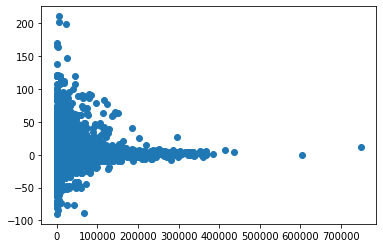

In [474]:
plt.scatter(train['total_open_amount'],train['delay'])

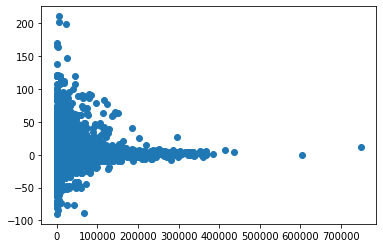

In [475]:
plt.scatter(train['total_open_amount'],train['delay'])

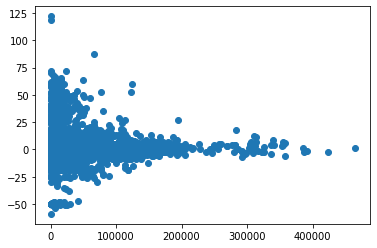

In [476]:
plt.scatter(validation['total_open_amount'],validation['delay'])

array([[<AxesSubplot:title={'center':'document_create_date'}>]],
      dtype=object)

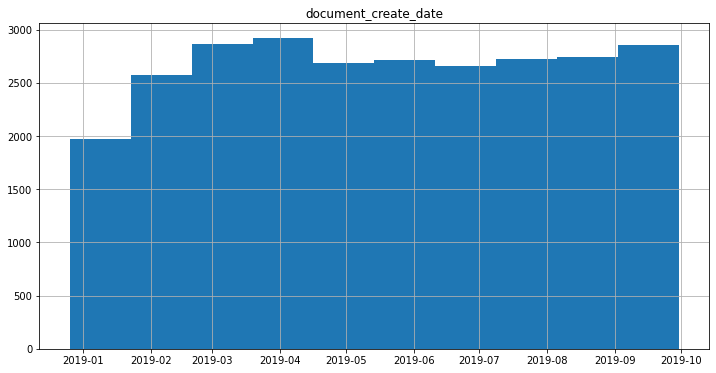

In [477]:
train.hist(column='document_create_date',figsize=[12,6])

array([[<AxesSubplot:title={'center':'document_create_date'}>]],
      dtype=object)

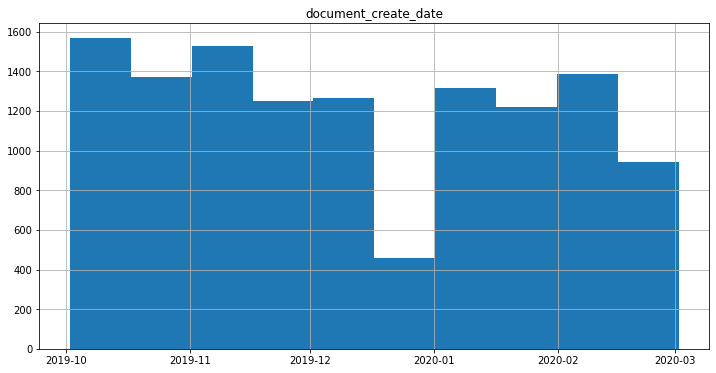

In [478]:
validation.hist(column='document_create_date',figsize=[12,6])

<AxesSubplot:xlabel='delay'>

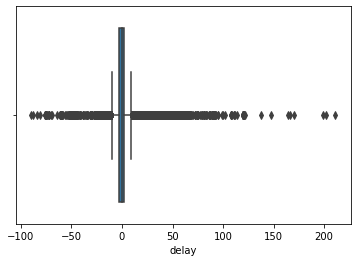

In [479]:
sns.boxplot(x=train['delay'])

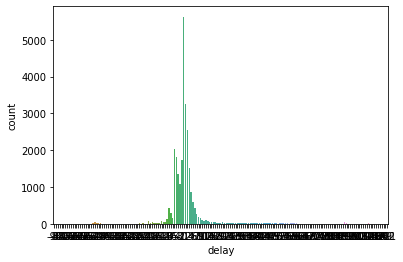

In [480]:
p = sns.countplot(data=train, x = 'delay')

# feature engineering 

In [481]:
# label encoding of business_code in train dataset and validation dataseta

In [482]:
train['business_code'].nunique()

6

In [483]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(train['business_code'])
train['business_code_enc'] = business_code_encoder.transform(train['business_code'])

In [484]:
train[['business_code_enc','business_code']]

,business_code_enc,business_code
5908,5,U013
3739,5,U013
34790,1,U001
18945,1,U001
34226,1,U001
...,...,...
37876,1,U001
22517,1,U001
40354,0,CA02
40479,1,U001


In [485]:
# droping the business code column frommthre train datset 
train.drop('business_code',axis=1,inplace=True)

In [486]:
business_code_encoder.fit(validation['business_code'])
validation['business_code_enc'] = business_code_encoder.transform(validation['business_code'])

In [487]:
validation[['business_code_enc','business_code']]

,business_code_enc,business_code
12233,0,CA02
38563,1,U001
38552,1,U001
33459,1,U001
11976,1,U001
...,...,...
30036,1,U001
20838,1,U001
2740,1,U001
6279,1,U001


In [488]:
# droping the business code column from the validation dataset 
validation.drop('business_code',axis=1,inplace=True)

In [489]:
# label encoding of invoice currency in train and validation dataset
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(train['invoice_currency'])
train['invoice_currency_enc'] = invoice_currency_encoder.transform(train['invoice_currency'])

In [490]:
train[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
5908,1,USD
3739,1,USD
34790,1,USD
18945,1,USD
34226,1,USD
...,...,...
37876,1,USD
22517,1,USD
40354,0,CAD
40479,1,USD


In [491]:
train.drop('invoice_currency',axis=1,inplace=True)

In [492]:
validation['invoice_currency_enc'] = invoice_currency_encoder.transform(validation['invoice_currency'])

In [493]:
validation[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
12233,0,CAD
38563,1,USD
38552,1,USD
33459,1,USD
11976,1,USD
...,...,...
30036,1,USD
20838,1,USD
2740,1,USD
6279,1,USD


In [494]:
validation.drop('invoice_currency',axis=1,inplace=True)

In [495]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26698 entries, 5908 to 24291
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           26698 non-null  object        
 1   name_customer         26698 non-null  object        
 2   clear_date            26698 non-null  datetime64[ns]
 3   buisness_year         26698 non-null  float64       
 4   doc_id                26698 non-null  float64       
 5   posting_date          26698 non-null  object        
 6   document_create_date  26698 non-null  datetime64[ns]
 7   due_in_date           26698 non-null  datetime64[ns]
 8   document type         26698 non-null  object        
 9   total_open_amount     26698 non-null  float64       
 10  baseline_create_date  26698 non-null  datetime64[ns]
 11  cust_payment_terms    26698 non-null  object        
 12  isOpen                26698 non-null  int64         
 13  delay        

In [496]:
# droping the document type as it does not effect the target variavle 
train.drop('document type',axis=1,inplace=True)
validation.drop('document type',axis=1,inplace=True)

In [497]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26698 entries, 5908 to 24291
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           26698 non-null  object        
 1   name_customer         26698 non-null  object        
 2   clear_date            26698 non-null  datetime64[ns]
 3   buisness_year         26698 non-null  float64       
 4   doc_id                26698 non-null  float64       
 5   posting_date          26698 non-null  object        
 6   document_create_date  26698 non-null  datetime64[ns]
 7   due_in_date           26698 non-null  datetime64[ns]
 8   total_open_amount     26698 non-null  float64       
 9   baseline_create_date  26698 non-null  datetime64[ns]
 10  cust_payment_terms    26698 non-null  object        
 11  isOpen                26698 non-null  int64         
 12  delay                 26698 non-null  int64         
 13  business_code

In [498]:
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(train['name_customer'])
train['name_customer_enc'] = name_customer_encoder.transform(train['name_customer'])

In [499]:
train[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
5908,1188,GLOBAL us
3739,676,COS corporation
34790,690,COST trust
18945,353,BJ'S corporation
34226,3219,WAL-MAR associates
...,...,...
37876,2561,SA associates
22517,293,BE associates
40354,2525,RONALD co
40479,1136,GENE in


In [500]:
train.drop('name_customer',axis=1,inplace=True)

In [501]:
name_customer_encoder.fit(validation['name_customer'])
validation['name_customer_enc'] = name_customer_encoder.transform(validation['name_customer'])

In [502]:
validation[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
12233,1297,METRO
38563,1842,SUPE corp
38552,2059,WAKE corp
33459,1955,TARG us
11976,1064,KRAFT F foundation
...,...,...
30036,2093,WAL-MAR trust
20838,1746,SMART & associates
2740,1588,RESTA
6279,2027,US associates


In [503]:
validation.drop('name_customer',axis=1,inplace=True)

In [504]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(train['cust_number'])
train['cust_number_enc'] = cust_number_encoder.transform(train['cust_number'])

In [505]:
train[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
5908,64,0100024077
3739,281,0140103423
34790,807,0200794332
18945,642,0200726979
34226,740,0200769623
...,...,...
37876,715,0200759878
22517,822,0200806580
40354,367,0140118168
40479,481,0200397082


In [506]:
train.drop('cust_number',axis=1,inplace=True)

In [507]:
cust_number_encoder.fit(validation['cust_number'])
validation['cust_number_enc'] = cust_number_encoder.transform(validation['cust_number'])

In [508]:
validation[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
12233,173,0140104423
38563,445,0200741831
38552,380,0200704858
33459,455,0200744019
11976,655,CCU013
...,...,...
30036,499,0200769623
20838,386,0200707741
2740,616,0200974851
6279,599,0200895843


In [509]:
validation.drop('cust_number',axis=1,inplace=True)

In [510]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26698 entries, 5908 to 24291
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            26698 non-null  datetime64[ns]
 1   buisness_year         26698 non-null  float64       
 2   doc_id                26698 non-null  float64       
 3   posting_date          26698 non-null  object        
 4   document_create_date  26698 non-null  datetime64[ns]
 5   due_in_date           26698 non-null  datetime64[ns]
 6   total_open_amount     26698 non-null  float64       
 7   baseline_create_date  26698 non-null  datetime64[ns]
 8   cust_payment_terms    26698 non-null  object        
 9   isOpen                26698 non-null  int64         
 10  delay                 26698 non-null  int64         
 11  business_code_enc     26698 non-null  int32         
 12  invoice_currency_enc  26698 non-null  int32         
 13  name_customer

In [511]:
train['total_open_amount']=train['total_open_amount'].astype(int)

In [512]:
train['doc_id']=train['doc_id'].astype(int)

In [513]:
train['buisness_year']=train['buisness_year'].astype(int)

In [514]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26698 entries, 5908 to 24291
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            26698 non-null  datetime64[ns]
 1   buisness_year         26698 non-null  int32         
 2   doc_id                26698 non-null  int32         
 3   posting_date          26698 non-null  object        
 4   document_create_date  26698 non-null  datetime64[ns]
 5   due_in_date           26698 non-null  datetime64[ns]
 6   total_open_amount     26698 non-null  int32         
 7   baseline_create_date  26698 non-null  datetime64[ns]
 8   cust_payment_terms    26698 non-null  object        
 9   isOpen                26698 non-null  int64         
 10  delay                 26698 non-null  int64         
 11  business_code_enc     26698 non-null  int32         
 12  invoice_currency_enc  26698 non-null  int32         
 13  name_customer

In [515]:
validation['total_open_amount']=validation['total_open_amount'].astype(int)

In [516]:
validation['doc_id']=validation['doc_id'].astype(int)

In [517]:
validation['buisness_year']=validation['buisness_year'].astype(int)

In [518]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12307 entries, 12233 to 16157
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            12307 non-null  datetime64[ns]
 1   buisness_year         12307 non-null  int32         
 2   doc_id                12307 non-null  int32         
 3   posting_date          12307 non-null  object        
 4   document_create_date  12307 non-null  datetime64[ns]
 5   due_in_date           12307 non-null  datetime64[ns]
 6   total_open_amount     12307 non-null  int32         
 7   baseline_create_date  12307 non-null  datetime64[ns]
 8   cust_payment_terms    12307 non-null  object        
 9   isOpen                12307 non-null  int64         
 10  delay                 12307 non-null  int64         
 11  business_code_enc     12307 non-null  int32         
 12  invoice_currency_enc  12307 non-null  int32         
 13  name_custome

In [519]:
 train['cust_payment_terms'].nunique()

66

In [520]:
# label encoding of customer payment terms 
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(train['cust_payment_terms'])
train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(train['cust_payment_terms'])

In [521]:
train[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
5908,56,NAVF
3739,55,NAVE
34790,22,NAAX
18945,20,NAA8
34226,33,NAH4
...,...,...
37876,33,NAH4
22517,20,NAA8
40354,6,CA30
40479,58,NAVM


In [522]:
train.drop('cust_payment_terms',axis=1,inplace=True)

In [523]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26698 entries, 5908 to 24291
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              26698 non-null  datetime64[ns]
 1   buisness_year           26698 non-null  int32         
 2   doc_id                  26698 non-null  int32         
 3   posting_date            26698 non-null  object        
 4   document_create_date    26698 non-null  datetime64[ns]
 5   due_in_date             26698 non-null  datetime64[ns]
 6   total_open_amount       26698 non-null  int32         
 7   baseline_create_date    26698 non-null  datetime64[ns]
 8   isOpen                  26698 non-null  int64         
 9   delay                   26698 non-null  int64         
 10  business_code_enc       26698 non-null  int32         
 11  invoice_currency_enc    26698 non-null  int32         
 12  name_customer_enc       26698 non-null  int

In [524]:
cust_payment_terms_encoder.fit(validation['cust_payment_terms'])
validation['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(validation['cust_payment_terms'])

In [525]:
validation[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
12233,4,CA10
38563,14,NAA8
38552,14,NAA8
33459,14,NAA8
11976,46,NAX2
...,...,...
30036,28,NAH4
20838,14,NAA8
2740,14,NAA8
6279,14,NAA8


In [526]:
validation.drop('cust_payment_terms',axis=1,inplace=True)

In [527]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12307 entries, 12233 to 16157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              12307 non-null  datetime64[ns]
 1   buisness_year           12307 non-null  int32         
 2   doc_id                  12307 non-null  int32         
 3   posting_date            12307 non-null  object        
 4   document_create_date    12307 non-null  datetime64[ns]
 5   due_in_date             12307 non-null  datetime64[ns]
 6   total_open_amount       12307 non-null  int32         
 7   baseline_create_date    12307 non-null  datetime64[ns]
 8   isOpen                  12307 non-null  int64         
 9   delay                   12307 non-null  int64         
 10  business_code_enc       12307 non-null  int32         
 11  invoice_currency_enc    12307 non-null  int32         
 12  name_customer_enc       12307 non-null  in

In [528]:
# spliting the validation into validation and test dataset according to the date 
validation.tail()
validation.shape

(12307, 15)

In [529]:
test2=validation.loc[validation['document_create_date']>'2019-12-15',:]
test2.shape

(5366, 15)

In [530]:
validation=validation.loc[validation['document_create_date']<'2019-12-15',:]
validation.shape

(6912, 15)

In [531]:
train

,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,isOpen,delay,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc
5908,2019-02-14,2019,1991819455,2018-12-30,2018-12-26,2019-02-13,11734,2018-12-30,0,1,5,1,1188,64,56
3739,2019-01-17,2019,1991820235,2019-01-01,2018-12-28,2019-01-31,3533,2019-01-01,0,-14,5,1,676,281,55
34790,2019-01-17,2019,1928532401,2018-12-30,2018-12-29,2019-01-14,2052,2018-12-30,0,3,1,1,690,807,22
18945,2019-01-15,2019,1928541143,2018-12-31,2018-12-29,2019-01-15,31,2018-12-31,0,0,1,1,353,642,20
34226,2019-01-09,2019,1928542101,2018-12-30,2018-12-29,2019-01-14,3748,2018-12-30,0,-5,1,1,3219,740,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37876,2019-10-16,2019,1929928971,2019-09-29,2019-09-30,2019-10-14,29804,2019-09-29,0,2,1,1,2561,715,33
22517,2019-10-11,2019,1929922387,2019-09-30,2019-09-30,2019-10-15,1626,2019-09-30,0,-4,1,1,293,822,20
40354,2019-10-29,2019,-2147483648,2019-09-30,2019-09-30,2019-10-31,22560,2019-10-01,0,-2,0,0,2525,367,6
40479,2019-12-31,2019,1929941680,2019-09-30,2019-09-30,2019-12-29,6271,2019-09-30,0,2,1,1,1136,481,58


In [532]:
validation

,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,isOpen,delay,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc
12233,2019-10-11,2019,-2147483648,2019-10-02,2019-10-02,2019-10-13,48544,2019-10-03,0,-2,0,0,1297,173,4
38563,2019-10-21,2019,1929954182,2019-10-02,2019-10-02,2019-10-17,20910,2019-10-02,0,4,1,1,1842,445,14
38552,2019-10-15,2019,1929953085,2019-10-03,2019-10-02,2019-10-18,156626,2019-10-03,0,-3,1,1,2059,380,14
33459,2019-10-22,2019,1929956701,2019-10-04,2019-10-02,2019-10-19,4614,2019-10-04,0,3,1,1,1955,455,14
11976,2019-11-27,2019,1929950641,2019-10-02,2019-10-02,2019-10-02,10204,2019-10-02,0,56,1,1,1064,655,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17598,2019-12-26,2019,1930281807,2019-12-15,2019-12-14,2019-12-30,38647,2019-12-15,0,-4,1,1,2087,499,28
37066,2019-12-27,2019,1930281695,2019-12-16,2019-12-14,2019-12-31,629,2019-12-16,0,-4,1,1,2089,499,28
35407,2019-12-31,2019,1930281612,2019-12-16,2019-12-14,2019-12-31,29189,2019-12-16,0,0,1,1,306,484,19
48606,2019-12-27,2019,1930282200,2019-12-16,2019-12-14,2019-12-31,18533,2019-12-16,0,-4,1,1,2092,499,28


In [533]:
test2

,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,isOpen,delay,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc
14440,2019-12-31,2019,1930284445,2019-12-16,2019-12-16,2019-12-31,137658,2019-12-16,0,0,1,1,298,614,19
1522,2019-12-23,2019,1930284147,2019-12-17,2019-12-16,2020-01-01,7950,2019-12-17,0,-9,1,1,1360,57,14
26229,2019-12-27,2019,-2147483648,2019-12-16,2019-12-16,2019-12-28,15930,2019-12-18,0,-1,0,0,435,174,4
14211,2019-12-31,2019,1930283023,2019-12-16,2019-12-16,2019-12-31,53841,2019-12-16,0,0,1,1,1844,607,14
35998,2019-12-31,2019,1930283283,2019-12-18,2019-12-16,2020-01-02,134454,2019-12-18,0,-2,1,1,857,485,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30036,2020-03-10,2020,1930576454,2020-02-26,2020-02-27,2020-03-12,5126,2020-02-26,0,-2,1,1,2093,499,28
20838,2020-03-12,2020,1930576250,2020-02-27,2020-02-27,2020-03-13,19447,2020-02-27,0,-1,1,1,1746,386,14
2740,2020-03-12,2020,1930576583,2020-02-26,2020-02-27,2020-03-12,4235,2020-02-26,0,0,1,1,1588,616,14
6279,2020-03-13,2020,1930581312,2020-02-27,2020-02-28,2020-03-13,35655,2020-02-27,0,0,1,1,2027,599,14


In [534]:
# droping the posting date and baseline date as it is a duplicate of document create date and it does not effect the target variavled elay
train.drop('baseline_create_date',axis=1,inplace=True)


In [535]:
validation.drop('baseline_create_date',axis=1,inplace=True)


In [536]:
test2.drop('baseline_create_date',axis=1,inplace=True)


In [537]:
test2.drop('posting_date',axis=1,inplace=True)

In [538]:
train.drop('posting_date',axis=1,inplace=True)

In [539]:
validation.drop('posting_date',axis=1,inplace=True)

In [540]:
train.cov()

,buisness_year,doc_id,total_open_amount,isOpen,delay,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc
buisness_year,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
doc_id,0.0,1.220477e+18,-8.083239e+12,0.0,-1.781054e+09,3.227413e+08,2.992706e+08,1.419259e+10,1.005845e+11,6.590879e+09
total_open_amount,0.0,-8.083239e+12,1.553117e+09,0.0,4.457947e+03,-2.598990e+03,-1.980542e+03,-3.234341e+05,-7.344837e+05,-9.063254e+04
isOpen,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
delay,0.0,-1.781054e+09,4.457947e+03,0.0,1.349649e+02,1.086135e-01,-4.392226e-01,-1.388101e+02,2.996175e+02,6.525682e+00
business_code_enc,0.0,3.227413e+08,-2.598990e+03,0.0,1.086135e-01,3.122630e-01,7.824134e-02,-2.697623e+01,1.641820e+01,3.238473e+00
invoice_currency_enc,0.0,2.992706e+08,-1.980542e+03,0.0,-4.392226e-01,7.824134e-02,7.338748e-02,3.603549e+00,2.470090e+01,1.610445e+00
name_customer_enc,0.0,1.419259e+10,-3.234341e+05,0.0,-1.388101e+02,-2.697623e+01,3.603549e+00,1.227074e+06,3.997433e+04,1.159611e+03
cust_number_enc,0.0,1.005845e+11,-7.344837e+05,0.0,2.996175e+02,1.641820e+01,2.470090e+01,3.997433e+04,5.579787e+04,9.787954e+02
cust_payment_terms_enc,0.0,6.590879e+09,-9.063254e+04,0.0,6.525682e+00,3.238473e+00,1.610445e+00,1.159611e+03,9.787954e+02,1.308236e+02


In [541]:
train.shape,validation.shape,test2.shape


((26698, 13), (6912, 13), (5366, 13))

In [542]:
# split the data such that x_train and y_tarin where y_train contains the target variable
y_train=train['delay']

In [543]:
y_validation=validation['delay']

In [544]:
y_test2=test2['delay']

In [545]:
x_train=train.drop('delay',axis=1)

In [546]:
x_validation=validation.drop('delay',axis=1)

In [547]:
x_test2=test2.drop('delay',axis=1)

In [548]:
x_train['due_day'] = x_train['due_in_date'].dt.day

In [549]:
x_train['created_day'] = x_train['document_create_date'].dt.day

In [550]:

x_train['due_month'] = x_train['due_in_date'].dt.month

In [551]:

x_train['created_month'] = x_train['document_create_date'].dt.month

In [552]:

x_train['due_year'] = x_train['due_in_date'].dt.year


In [553]:
x_train['created_year'] = x_train['document_create_date'].dt.year

In [554]:
x_validation['due_day'] = x_validation['due_in_date'].dt.day

In [555]:
x_validation['created_day'] = x_validation['document_create_date'].dt.day

In [556]:

x_validation['due_month'] = x_validation['due_in_date'].dt.month

In [557]:
x_validation['created_month'] = x_validation['document_create_date'].dt.month

In [558]:

x_validation['due_year'] = x_validation['due_in_date'].dt.year



In [559]:
x_validation['created_year'] = x_validation['document_create_date'].dt.year

In [560]:

x_test2['due_day'] = x_test2['due_in_date'].dt.day

In [561]:
x_test2['created_day'] = x_test2['document_create_date'].dt.day

In [562]:
x_test2['due_month'] = x_test2['due_in_date'].dt.month

In [563]:
x_test2['created_month'] = x_test2['document_create_date'].dt.month

In [564]:

x_test2['due_year'] = x_test2['due_in_date'].dt.year

In [565]:
x_test2['created_year'] = x_test2['document_create_date'].dt.year

In [566]:
x_train.shape,x_validation.shape,x_test2.shape

((26698, 18), (6912, 18), (5366, 18))

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

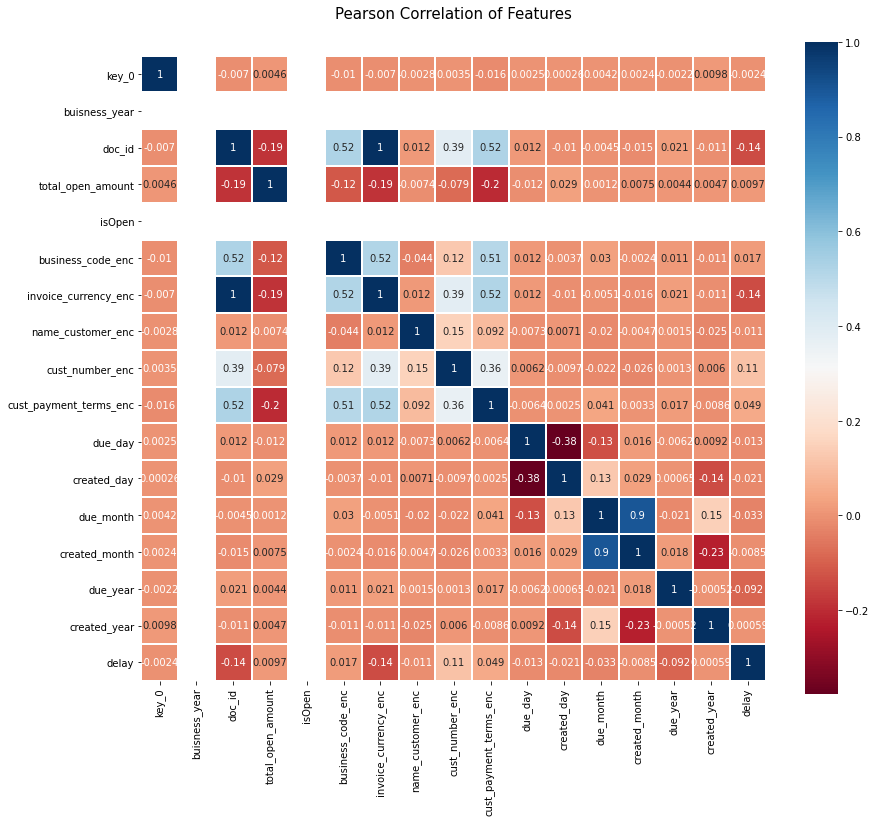

In [567]:

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [568]:
# here we can see that isopen  and business year is not effect ing the target delayt so we can drop them
x_train.drop('isOpen',axis=1,inplace=True)

In [569]:
x_validation.drop('isOpen',axis=1,inplace=True)

In [570]:
x_test2.drop('isOpen',axis=1,inplace=True)

In [571]:
# droped the duein date column because it is converted into int due day due month
x_train.drop('due_in_date',axis=1,inplace=True)

In [572]:
x_validation.drop('due_in_date',axis=1,inplace=True)

In [573]:
x_test2.drop('due_in_date',axis=1,inplace=True)

In [574]:
x_train.drop('document_create_date',axis=1,inplace=True)

In [575]:
x_validation.drop('document_create_date',axis=1,inplace=True)

In [576]:
x_test2.drop('document_create_date',axis=1,inplace=True)

In [577]:
x_train.shape,x_validation.shape,x_test2.shape

((26698, 15), (6912, 15), (5366, 15))

In [578]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26698 entries, 5908 to 24291
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              26698 non-null  datetime64[ns]
 1   buisness_year           26698 non-null  int32         
 2   doc_id                  26698 non-null  int32         
 3   total_open_amount       26698 non-null  int32         
 4   business_code_enc       26698 non-null  int32         
 5   invoice_currency_enc    26698 non-null  int32         
 6   name_customer_enc       26698 non-null  int32         
 7   cust_number_enc         26698 non-null  int32         
 8   cust_payment_terms_enc  26698 non-null  int32         
 9   due_day                 26698 non-null  int64         
 10  created_day             26698 non-null  int64         
 11  due_month               26698 non-null  int64         
 12  created_month           26698 non-null  int

In [579]:

x_train.drop('clear_date',axis=1,inplace=True)

In [580]:
x_validation.drop('clear_date',axis=1,inplace=True)

In [581]:
# droping the clear date column 


x_test2.drop('clear_date',axis=1,inplace=True)

In [582]:
x_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6912 entries, 12233 to 12315
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   buisness_year           6912 non-null   int32
 1   doc_id                  6912 non-null   int32
 2   total_open_amount       6912 non-null   int32
 3   business_code_enc       6912 non-null   int32
 4   invoice_currency_enc    6912 non-null   int32
 5   name_customer_enc       6912 non-null   int32
 6   cust_number_enc         6912 non-null   int32
 7   cust_payment_terms_enc  6912 non-null   int32
 8   due_day                 6912 non-null   int64
 9   created_day             6912 non-null   int64
 10  due_month               6912 non-null   int64
 11  created_month           6912 non-null   int64
 12  due_year                6912 non-null   int64
 13  created_year            6912 non-null   int64
dtypes: int32(8), int64(6)
memory usage: 594.0 KB


# Modelling



In [583]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression()

In [584]:
y_predict = base_model.predict(x_validation)

In [585]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_validation, y_predict, squared=False)

8.077036226650689

In [586]:
met = pd.DataFrame(zip(y_predict , y_test2),columns=['Predicted','Actuals'])

In [587]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

In [588]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [589]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [590]:
y_predict2 = regressor.predict(x_validation)

In [591]:
mean_squared_error(y_validation, y_predict2, squared=False)

7.757570245003736

In [592]:
y_predict_test = regressor.predict(x_test2)
mean_squared_error(y_test2, y_predict_test, squared=False)

10.704842273750165

# The lost data


In [593]:
# now label encoding has to be done on main test dataset which contain clear date null values 
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200915438,GROC corporation,NaT,2020.0,1.930592e+09,2020-03-05,2020-03-03,2020-03-20,USD,RV,11343.00,2020-03-05,NAA8,1
6,U001,0200705742,DOT foundation,NaT,2020.0,1.930653e+09,2020-03-16,2020-03-16,2020-04-17,USD,RV,20683.23,2020-03-16,NA32,1
9,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930808e+09,2020-04-21,2020-04-21,2020-05-06,USD,RV,1898.90,2020-04-21,NAH4,1
15,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930731e+09,2020-04-01,2020-04-01,2020-04-16,USD,RV,1276.23,2020-04-01,NAU5,1
17,U001,200555117,BURR co,NaT,2020.0,1.930749e+09,2020-04-05,2020-04-04,2020-04-20,USD,RV,118391.34,2020-04-05,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,CA02,0140105508,DOLLARA systems,NaT,2020.0,2.960618e+09,2020-03-02,2020-03-02,2020-03-15,CAD,RV,41133.74,2020-03-05,CA10,1
49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930711e+09,2020-03-28,2020-03-27,2020-04-12,USD,RV,33635.14,2020-03-28,NAH4,1
49994,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930829e+09,2020-04-26,2020-04-27,2020-05-11,USD,RV,9484.93,2020-04-26,NAH4,1
49997,U001,0200769623,WAL-MAR,NaT,2020.0,1.930704e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,24123.89,2020-03-25,NAH4,1


In [594]:
x_train

,buisness_year,doc_id,total_open_amount,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,due_day,created_day,due_month,created_month,due_year,created_year
5908,2019,1991819455,11734,5,1,1188,64,56,13,26,2,12,2019,2018
3739,2019,1991820235,3533,5,1,676,281,55,31,28,1,12,2019,2018
34790,2019,1928532401,2052,1,1,690,807,22,14,29,1,12,2019,2018
18945,2019,1928541143,31,1,1,353,642,20,15,29,1,12,2019,2018
34226,2019,1928542101,3748,1,1,3219,740,33,14,29,1,12,2019,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37876,2019,1929928971,29804,1,1,2561,715,33,14,30,10,9,2019,2019
22517,2019,1929922387,1626,1,1,293,822,20,15,30,10,9,2019,2019
40354,2019,-2147483648,22560,0,0,2525,367,6,31,30,10,9,2019,2019
40479,2019,1929941680,6271,1,1,1136,481,58,29,30,12,9,2019,2019


In [595]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(test['business_code'])
test['business_code_enc'] = business_code_encoder.transform(test['business_code'])

In [596]:
test[['business_code_enc','business_code']]

,business_code_enc,business_code
0,1,U001
6,1,U001
9,1,U001
15,1,U001
17,1,U001
...,...,...
49985,0,CA02
49992,1,U001
49994,1,U001
49997,1,U001


In [597]:
# droping the business code column frommthre train datset 
test.drop('business_code',axis=1,inplace=True)

In [598]:
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(test['invoice_currency'])
test['invoice_currency_enc'] = invoice_currency_encoder.transform(test['invoice_currency'])

In [599]:
test[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
0,1,USD
6,1,USD
9,1,USD
15,1,USD
17,1,USD
...,...,...
49985,0,CAD
49992,1,USD
49994,1,USD
49997,1,USD


In [600]:
test.drop('invoice_currency',axis=1,inplace=True)

In [601]:
test.drop('document type',axis=1,inplace=True)

In [602]:
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(test['name_customer'])
test['name_customer_enc'] = name_customer_encoder.transform(test['name_customer'])

In [603]:
test[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
0,658,GROC corporation
6,475,DOT foundation
9,1709,WAL-MAR associates
15,106,ASSOCIAT
17,223,BURR co
...,...,...
49985,467,DOLLARA systems
49992,1714,WAL-MAR in
49994,1715,WAL-MAR llc
49997,1708,WAL-MAR


In [604]:
test.drop('name_customer',axis=1,inplace=True)

In [605]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(test['cust_number'])
test['cust_number_enc'] = cust_number_encoder.transform(test['cust_number'])

In [606]:
test[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
0,478,0200915438
6,294,0200705742
9,391,0200769623
15,396,0200772670
17,551,200555117
...,...,...
49985,146,0140105508
49992,391,0200769623
49994,391,0200769623
49997,391,0200769623


In [607]:
test.drop('cust_number',axis=1,inplace=True)

In [608]:
test['total_open_amount']=test['total_open_amount'].astype(int)

In [609]:
test['doc_id']=test['doc_id'].astype(int)

In [610]:
test['buisness_year']=test['buisness_year'].astype(int)

In [611]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(test['cust_payment_terms'])
test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(test['cust_payment_terms'])

In [612]:
test[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
0,13,NAA8
6,8,NA32
9,28,NAH4
15,33,NAU5
17,13,NAA8
...,...,...
49985,3,CA10
49992,28,NAH4
49994,28,NAH4
49997,28,NAH4


In [613]:
test.drop('cust_payment_terms',axis=1,inplace=True)

In [614]:
test.drop('baseline_create_date',axis=1,inplace=True)

In [615]:
test.drop('posting_date',axis=1,inplace=True)

In [616]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              0 non-null      datetime64[ns]
 1   buisness_year           9712 non-null   int32         
 2   doc_id                  9712 non-null   int32         
 3   document_create_date    9712 non-null   datetime64[ns]
 4   due_in_date             9712 non-null   datetime64[ns]
 5   total_open_amount       9712 non-null   int32         
 6   isOpen                  9712 non-null   int64         
 7   business_code_enc       9712 non-null   int32         
 8   invoice_currency_enc    9712 non-null   int32         
 9   name_customer_enc       9712 non-null   int32         
 10  cust_number_enc         9712 non-null   int32         
 11  cust_payment_terms_enc  9712 non-null   int32         
dtypes: datetime64[ns](3), int32(8), int64(1)
memory

In [617]:
# sorting the testdatset according to document_created_date
test=test.sort_values(by="document_create_date")

In [618]:
test.drop('isOpen',axis=1,inplace=True)

In [619]:
test['due_day'] = test['due_in_date'].dt.day

In [620]:
test['created_day'] = test['document_create_date'].dt.day

In [621]:
test['due_month'] = test['due_in_date'].dt.month

In [622]:
test['created_month'] = test['document_create_date'].dt.month

In [623]:
test['due_year'] = test['due_in_date'].dt.year

In [624]:
test['created_year'] = test['document_create_date'].dt.year

In [625]:
test.drop('document_create_date',axis=1,inplace=True)

In [626]:
test_due_in_date=test['due_in_date']

In [627]:
test.drop('due_in_date',axis=1,inplace=True)

In [628]:
test.drop('clear_date',axis=1,inplace=True)

In [629]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 13246 to 36513
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   buisness_year           9712 non-null   int32
 1   doc_id                  9712 non-null   int32
 2   total_open_amount       9712 non-null   int32
 3   business_code_enc       9712 non-null   int32
 4   invoice_currency_enc    9712 non-null   int32
 5   name_customer_enc       9712 non-null   int32
 6   cust_number_enc         9712 non-null   int32
 7   cust_payment_terms_enc  9712 non-null   int32
 8   due_day                 9712 non-null   int64
 9   created_day             9712 non-null   int64
 10  due_month               9712 non-null   int64
 11  created_month           9712 non-null   int64
 12  due_year                9712 non-null   int64
 13  created_year            9712 non-null   int64
dtypes: int32(8), int64(6)
memory usage: 834.6 KB


In [630]:

predicted_delay = regressor.predict(test)

In [631]:
predicted_delay = pd.Series(predicted_delay,name='delay')

In [632]:
test.reset_index(drop=True,inplace=True)

In [633]:
Final = test.merge(predicted_delay , on = test.index )
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,due_day,created_day,due_month,created_month,due_year,created_year,delay
0,0,2020,1930539885,8899,1,1,628,415,8,31,18,3,2,2020,2020,1.200957
1,1,2020,1930547920,3608,1,1,985,381,13,13,19,3,2,2020,2020,1.200957
2,2,2020,1930544017,51242,1,1,1026,453,13,13,19,3,2,2020,2020,1.200957
3,3,2020,1930543106,2900,1,1,1715,391,28,13,19,3,2,2020,2020,-0.563080
4,4,2020,1930552721,14419,1,1,1029,453,13,13,20,3,2,2020,2020,1.200957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,9707,2020,1930914868,20756,1,1,983,343,13,2,18,6,5,2020,2020,1.200957
9708,9708,2020,1930913993,194864,1,1,929,243,6,29,19,5,5,2020,2020,1.200957
9709,9709,2020,1930916095,402,1,1,1225,507,6,29,19,5,5,2020,2020,1.200957
9710,9710,2020,1930923664,19798,1,1,1376,241,13,5,20,6,5,2020,2020,1.200957


In [634]:
Final['delay']=Final['delay'].astype(int)

In [635]:
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,due_day,created_day,due_month,created_month,due_year,created_year,delay
0,0,2020,1930539885,8899,1,1,628,415,8,31,18,3,2,2020,2020,1
1,1,2020,1930547920,3608,1,1,985,381,13,13,19,3,2,2020,2020,1
2,2,2020,1930544017,51242,1,1,1026,453,13,13,19,3,2,2020,2020,1
3,3,2020,1930543106,2900,1,1,1715,391,28,13,19,3,2,2020,2020,0
4,4,2020,1930552721,14419,1,1,1029,453,13,13,20,3,2,2020,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,9707,2020,1930914868,20756,1,1,983,343,13,2,18,6,5,2020,2020,1
9708,9708,2020,1930913993,194864,1,1,929,243,6,29,19,5,5,2020,2020,1
9709,9709,2020,1930916095,402,1,1,1225,507,6,29,19,5,5,2020,2020,1
9710,9710,2020,1930923664,19798,1,1,1376,241,13,5,20,6,5,2020,2020,1


In [636]:
test_due_in_date.reset_index(drop=True,inplace=True)

In [637]:
Final['due_in_date']=test_due_in_date

In [638]:
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,due_day,created_day,due_month,created_month,due_year,created_year,delay,due_in_date
0,0,2020,1930539885,8899,1,1,628,415,8,31,18,3,2,2020,2020,1,2020-03-31
1,1,2020,1930547920,3608,1,1,985,381,13,13,19,3,2,2020,2020,1,2020-03-13
2,2,2020,1930544017,51242,1,1,1026,453,13,13,19,3,2,2020,2020,1,2020-03-13
3,3,2020,1930543106,2900,1,1,1715,391,28,13,19,3,2,2020,2020,0,2020-03-13
4,4,2020,1930552721,14419,1,1,1029,453,13,13,20,3,2,2020,2020,1,2020-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,9707,2020,1930914868,20756,1,1,983,343,13,2,18,6,5,2020,2020,1,2020-06-02
9708,9708,2020,1930913993,194864,1,1,929,243,6,29,19,5,5,2020,2020,1,2020-05-29
9709,9709,2020,1930916095,402,1,1,1225,507,6,29,19,5,5,2020,2020,1,2020-05-29
9710,9710,2020,1930923664,19798,1,1,1376,241,13,5,20,6,5,2020,2020,1,2020-06-05


# RESULT

PREDICTED DATE CAN BE FUND WITH THE HELP OF DELAY COLUMN PREDICTED BY MODEL

In [639]:
Final['predicted_date']=Final['due_in_date']+pd.to_timedelta(Final['delay'],unit='D')

In [640]:
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,invoice_currency_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,due_day,created_day,due_month,created_month,due_year,created_year,delay,due_in_date,predicted_date
0,0,2020,1930539885,8899,1,1,628,415,8,31,18,3,2,2020,2020,1,2020-03-31,2020-04-01
1,1,2020,1930547920,3608,1,1,985,381,13,13,19,3,2,2020,2020,1,2020-03-13,2020-03-14
2,2,2020,1930544017,51242,1,1,1026,453,13,13,19,3,2,2020,2020,1,2020-03-13,2020-03-14
3,3,2020,1930543106,2900,1,1,1715,391,28,13,19,3,2,2020,2020,0,2020-03-13,2020-03-13
4,4,2020,1930552721,14419,1,1,1029,453,13,13,20,3,2,2020,2020,1,2020-03-13,2020-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,9707,2020,1930914868,20756,1,1,983,343,13,2,18,6,5,2020,2020,1,2020-06-02,2020-06-03
9708,9708,2020,1930913993,194864,1,1,929,243,6,29,19,5,5,2020,2020,1,2020-05-29,2020-05-30
9709,9709,2020,1930916095,402,1,1,1225,507,6,29,19,5,5,2020,2020,1,2020-05-29,2020-05-30
9710,9710,2020,1930923664,19798,1,1,1376,241,13,5,20,6,5,2020,2020,1,2020-06-05,2020-06-06
